# Predicting Chub Density based on river environment

https://github.com/bendavidhayes/ML2_Final_Project

# Project Topic
This Notebook analyzes how the environment impacts fish life, specifically a fish called chub aka Cyprinid

**Goal:** The objective of the analysis is to develop a model to accurately predict the amount of fish in a river section, based on environmental factors and to identify the most important environmental factors.

# Data Description
The Data used in this analysis was provided by the University of Natural Resources and Life Sciences in Vienna, Austria. 

It was collected in a variety of rivers in Austria. For each observation a section of a river was contained using nets. All fish in the containment were caught, weighed and then released. The target in this analysis is the biomass of all fish (Chub) caught in a section, measured in kg/ha.

**Goal:** The objective of the analysis is to develop a model to accurately predict the amount of fish in a river section, based on environmental factors

**target:** 
- Chub_BIO: Chub Biomass (kg/ha)

**some of the features:**
- CL1_XXX: Group of features describing type of area surrounding the catchment area
    - artificial(e.g. Building, street),
    - agricultural,
    - wetland,
    - Water Bodies (other rivers, lakes, etc.)
- SSI: Standard Sinuousity Index (higher values reflect more curves in the river)
- BW_MORPH: Riverbank width morphology index
- PHB_SAPRO: phytobenthic condition (i.e. amount of algae)
- MZB_SAPRO: saprobic condition (i.e. organic pollution)
- TROPH_ZUST: trophic condition (i.e. nutrient density)
- ZUST_SCHAD = ZUST_SCHADST_EU_2015: pollutant grading according to EU standard
- ZUST_BIO_7 = ZUST_BIOLOGIE_STOFFE_2015: grading of biological condition
- SUBSTRATZUSAMMENSETZUNG: composition of river substrate
- FIA: Fish Index Austria
- Chub_corridor_m: length of river system, that is accessible to fish
- 5J_AMP_50_REL_MAXNAT: hydrological variable                  
- 5J_MAFR_CNT: hydrological variable

# Import Libraries & Data 

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy as sp
import scipy.stats as stats
import seaborn as sns

In [94]:
#read file
xl_file_path = "C:/Users/benda/Documents/Notebooks/Chub/Cyprinid_Data.xlsx"
df = pd.read_excel(xl_file_path)

# select labels to include in analysis
labels = ["Chub_BIO",
            "Chub_corridor_m",
            "dfkm",
            "CL1_Artificial surfaces",
            "CL1_Agricultural areas",
            "CL1_Wetlands",
            "CL1_Water bodies",
            "RL1_Artificial Surfaces",
            "RL1_Agricultural areas",
            "RL1_Forest and semi natural areas",
            "RL1_Wetlands",
            "RL1_Water bodies",
            "CI",
            "SSI",
            "MZB_SAPRO",
            "ZUST_SCHAD = ZUST_SCHADST_EU_2015",
            "ZUST_SC_11 = ZUST_SCHADST_NAT_2015",
            "ZUST_BIO_7 = ZUST_BIOLOGIE_STOFFE_2015",
            "MORPHOLOGIE",
            "SOHLDYNAMIK",
            "SUBSTRATZUSAMMENSETZUNG",
            "UFERBEGLEITSAUM",
            "5J_AMP_CNT",
            "5J_AMP_95_DW_MW",
            "5J_MAFR_CNT",
            "5J_MAFR_95_REL_MAXNAT",
            "5J_MAFR_95_DW_MW"]
df = df[labels]

# Exploratory Data Analysis (EDA)
In this section, we will explore the dataset to understand the distribution of the data, identify correlations between features, and check for any outliers or missing values.

In [14]:
df.info() # show basic info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Chub_BIO                                191 non-null    float64
 1   Chub_corridor_m                         189 non-null    float64
 2   dfkm                                    191 non-null    float64
 3   CL1_Artificial surfaces                 191 non-null    float64
 4   CL1_Agricultural areas                  191 non-null    float64
 5   CL1_Wetlands                            191 non-null    float64
 6   CL1_Water bodies                        191 non-null    float64
 7   RL1_Artificial Surfaces                 191 non-null    float64
 8   RL1_Agricultural areas                  191 non-null    float64
 9   RL1_Forest and semi natural areas       191 non-null    float64
 10  RL1_Wetlands                            191 non-null    float6

The data set has 115 observations and 16 features (including the target). There are 10 quantitative variables, 3 ordinal, and 3 qualitative. Four features have missing values. 

In [15]:
pd.set_option('display.max_columns', 30) # increase max columns shown in output

df.describe() # summary statistics of quantitative variables

,Chub_BIO,Chub_corridor_m,dfkm,CL1_Artificial surfaces,CL1_Agricultural areas,CL1_Wetlands,CL1_Water bodies,RL1_Artificial Surfaces,RL1_Agricultural areas,RL1_Forest and semi natural areas,RL1_Wetlands,RL1_Water bodies,CI,SSI,MZB_SAPRO,ZUST_SCHAD = ZUST_SCHADST_EU_2015,ZUST_BIO_7 = ZUST_BIOLOGIE_STOFFE_2015,MORPHOLOGIE,SOHLDYNAMIK,SUBSTRATZUSAMMENSETZUNG,UFERBEGLEITSAUM,5J_AMP_CNT,5J_MAFR_CNT
count,191.000000,189.000000,191.00000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,143.000000,146.000000,179.000000,179.000000
mean,53.653194,20020.054546,0.25356,0.062329,0.407731,0.003007,0.012293,0.191721,0.463790,0.223057,0.008709,0.049896,1.187354,1.086780,1.780105,1.020942,2.329843,2.225131,1.884817,1.307692,1.815068,240.966480,1127.346369
std,107.088845,37407.370974,4.61992,0.016013,0.161970,0.004143,0.010051,0.185659,0.273136,0.216519,0.051965,0.154689,0.212522,0.109153,0.149814,0.204119,0.681407,0.772281,0.819069,0.533798,0.742813,553.284949,2570.815416
min,0.000000,82.622809,-12.41000,0.033827,0.133281,0.000000,0.002948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000500,2110.804651,-1.86000,0.051312,0.260574,0.000505,0.007049,0.048846,0.268388,0.037731,0.000000,0.000000,1.058944,1.009868,1.750000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,33.500000,62.500000
50%,18.397000,5348.133727,0.17000,0.063618,0.353394,0.001200,0.010623,0.165192,0.459654,0.155340,0.000000,0.000000,1.123971,1.049790,1.750000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,61.000000,152.000000
75%,68.386000,14945.768048,2.49000,0.071134,0.563673,0.003384,0.010912,0.270220,0.701536,0.377182,0.000000,0.000000,1.230255,1.122075,1.750000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,127.000000,938.000000
max,951.296000,299483.235041,18.68000,0.087296,0.711895,0.012291,0.037724,0.843575,0.963668,0.916667,0.478754,1.000000,2.363636,1.913400,2.000000,3.000000,7.000000,4.000000,4.000000,3.000000,4.000000,3512.000000,19640.000000


In [16]:
df.head()

,Chub_BIO,Chub_corridor_m,dfkm,CL1_Artificial surfaces,CL1_Agricultural areas,CL1_Wetlands,CL1_Water bodies,RL1_Artificial Surfaces,RL1_Agricultural areas,RL1_Forest and semi natural areas,RL1_Wetlands,RL1_Water bodies,CI,SSI,MZB_SAPRO,ZUST_SCHAD = ZUST_SCHADST_EU_2015,ZUST_SC_11 = ZUST_SCHADST_NAT_2015,ZUST_BIO_7 = ZUST_BIOLOGIE_STOFFE_2015,MORPHOLOGIE,SOHLDYNAMIK,SUBSTRATZUSAMMENSETZUNG,UFERBEGLEITSAUM,5J_AMP_CNT,5J_AMP_95_DW_MW,5J_MAFR_CNT,5J_MAFR_95_REL_MAXNAT,5J_MAFR_95_DW_MW
0,0.00,9429.460433,-3.79,0.070794,0.336418,0.003384,0.037724,0.202830,0.231132,0.566038,0.0,0.0,1.007503,1.007143,1.50,1,2,2,2,2,2.0,2.0,2437.0,"0,867851197",6128.0,"1,458529463","0,221980987"
1,0.00,30268.862875,11.90,0.051312,0.209107,0.002268,0.007049,0.165192,0.249263,0.585546,0.0,0.0,1.964865,1.041361,1.75,1,2,2,2,1,NaN,NaN,551.0,"0,879404634",1623.0,"0,522304791","0,097711626"
2,0.00,79230.114262,7.54,0.040292,0.260574,0.001771,0.010912,0.500000,0.166667,0.333333,0.0,0.0,1.149748,1.121244,1.50,1,2,2,1,1,NaN,NaN,697.0,"0,43577716",4711.0,"0,980579832","0,092282222"
3,0.00,79230.114262,1.84,0.040292,0.260574,0.001771,0.010912,0.461538,0.307692,0.230769,0.0,0.0,1.068933,1.042523,1.75,1,2,2,1,1,NaN,NaN,925.0,"0,43577716",4003.0,"1,22572479","0,115352778"
4,0.01,79230.114262,3.54,0.040292,0.260574,0.001771,0.010912,0.000000,0.750000,0.250000,0.0,0.0,1.181183,1.129526,1.75,1,2,2,1,1,NaN,NaN,926.0,"0,43577716",4004.0,"1,22572479","0,115352778"


#### Reformating Features into correct data type
Some of the features need to be reformated, since they are mistakenly seen as objects instead of floats. It looks like these features used a comma instead of a decimal point.
Additionally each of these features has entries that can't be turned into floats:   
- ZUST_SC_11 = ZUST_SCHADST_NAT_2015: 'B'  
- 5J_AMP_95_DW_MW: '#NV'  
- 5J_MAFR_95_REL_MAXNAT: '#DIV/0!'  
- 5J_MAFR_95_DW_MW: '#NV'


In [72]:
print("ZUST_SC_11 = ZUST_SCHADST_NAT_2015: \n", df["ZUST_SC_11 = ZUST_SCHADST_NAT_2015"].unique())
print("5J_AMP_95_DW_MW: \n", df["5J_AMP_95_DW_MW"].unique())
print("5J_MAFR_95_REL_MAXNAT: \n", df["5J_MAFR_95_REL_MAXNAT"].unique())
print("5J_MAFR_95_DW_MW: \n", df["5J_MAFR_95_DW_MW"].unique())

ZUST_SC_11 = ZUST_SCHADST_NAT_2015: 
 ['2' '1' '3' 'B']
5J_AMP_95_DW_MW: 
 ['0,867851197' '0,879404634' '0,43577716' '0,511258909' '0,367755802'
 '0,4665379' '#NV' nan '0,929507908' '0,772810133' '4,791086802'
 '1,613062569' '0,438291419' '0,748067703' '0,90997854' '1,614809291'
 '2,280272564' '2,390078014' '2,31624425' '2,279539128' '2,539362471'
 '2,834962613' '0,814065891' '0,863949687' '2,730113702' '0,45350588'
 '2,684226011' '1,243625223' '1,190908932' '0,334325342' '2,409916633'
 '4,617457645' '1,785915109' '6,158606601' '0' '2,584842672' '10,29890081'
 '1,725371176' '1,311829589' '0,703314086' '2,283198417' '0,897741665'
 '2,782528904' '0,559553666' '3,634882563' '2,562259059' '4,635295394'
 '2,296320652' '6,210045006' '4,652610356' '3,020526532' '1,386354903'
 '0,438265074' '4,475287188' '6,88249842' '2,086854151' '2,244349626'
 '0,520979645' '0,876644322' '2,939711978' '2,159061742' '1,914724118'
 '2,758663701' '0,454900255' '3,169065164' '2,874290809' '7,399842229'
 '0,67542

In [96]:
# replace entries
df["ZUST_SC_11 = ZUST_SCHADST_NAT_2015"] = df["ZUST_SC_11 = ZUST_SCHADST_NAT_2015"].replace('B', np.nan)
df["5J_AMP_95_DW_MW"] = df["5J_AMP_95_DW_MW"].replace('#NV', np.nan)
df["5J_MAFR_95_REL_MAXNAT"] = df["5J_MAFR_95_REL_MAXNAT"].replace('#DIV/0!', np.nan)
df["5J_MAFR_95_DW_MW"] = df["5J_MAFR_95_DW_MW"].replace('#NV', np.nan)

# replace commas with decimal points
df["ZUST_SC_11 = ZUST_SCHADST_NAT_2015"] = df["ZUST_SC_11 = ZUST_SCHADST_NAT_2015"].astype(str).str.replace(',','.')
df["5J_AMP_95_DW_MW"] = df["5J_AMP_95_DW_MW"].astype(str).str.replace(',','.')
df["5J_MAFR_95_REL_MAXNAT"] = df["5J_MAFR_95_REL_MAXNAT"].astype(str).str.replace(',','.')
df["5J_MAFR_95_DW_MW"] = df["5J_MAFR_95_DW_MW"].astype(str).str.replace(',','.')

# turn strings into floats
df["ZUST_SC_11 = ZUST_SCHADST_NAT_2015"] = df["ZUST_SC_11 = ZUST_SCHADST_NAT_2015"].astype('float')
df["5J_AMP_95_DW_MW"] = df["5J_AMP_95_DW_MW"].astype('float')
df["5J_MAFR_95_REL_MAXNAT"] = df["5J_MAFR_95_REL_MAXNAT"].astype('float')
df["5J_MAFR_95_DW_MW"] = df["5J_MAFR_95_DW_MW"].astype('float')

In [97]:
# check whether everything worked out
print("ZUST_SC_11 = ZUST_SCHADST_NAT_2015: \n", df["ZUST_SC_11 = ZUST_SCHADST_NAT_2015"].unique())
print("5J_AMP_95_DW_MW: \n", df["5J_AMP_95_DW_MW"].unique())
print("5J_MAFR_95_REL_MAXNAT: \n", df["5J_MAFR_95_REL_MAXNAT"].unique())
print("5J_MAFR_95_DW_MW: \n", df["5J_MAFR_95_DW_MW"].unique())

ZUST_SC_11 = ZUST_SCHADST_NAT_2015: 
 [ 2.  1.  3. nan]
5J_AMP_95_DW_MW: 
 [ 0.8678512   0.87940463  0.43577716  0.51125891  0.3677558   0.4665379
         nan  0.92950791  0.77281013  4.7910868   1.61306257  0.43829142
  0.7480677   0.90997854  1.61480929  2.28027256  2.39007801  2.31624425
  2.27953913  2.53936247  2.83496261  0.81406589  0.86394969  2.7301137
  0.45350588  2.68422601  1.24362522  1.19090893  0.33432534  2.40991663
  4.61745764  1.78591511  6.1586066   0.          2.58484267 10.29890081
  1.72537118  1.31182959  0.70331409  2.28319842  0.89774166  2.7825289
  0.55955367  3.63488256  2.56225906  4.63529539  2.29632065  6.21004501
  4.65261036  3.02052653  1.3863549   0.43826507  4.47528719  6.88249842
  2.08685415  2.24434963  0.52097965  0.87664432  2.93971198  2.15906174
  1.91472412  2.7586637   0.45490025  3.16906516  2.87429081  7.39984223
  0.67542525  1.2027293   3.22795287  0.44216987  1.56574145  0.47739588
  2.92933738  2.4825846   8.91317468  0.34582231  0.

### Check for Duplicates and Impute missing values
As you can see below there are no duplicate rows. 

But 9 Variables have missing values.  Curiously the last five features miss identical rows. Also the two features SUBSTRATZUSAMMENSETZUNG and 
UFERBEGLEITSAU miss the same rows.M

- 2 features are missing less than 5%,
- 5 features are missing between 5-10%. 
- 2 features are missing over 20%.
  
**Imputation Method:**
1. Features missing <5%: remove missing rows with missing observations
2. Features missing 5-10%: impute missing values with feature mean
3. Features missing over 20%: remove feature

In [81]:
df.duplicated().sum()

np.int64(0)

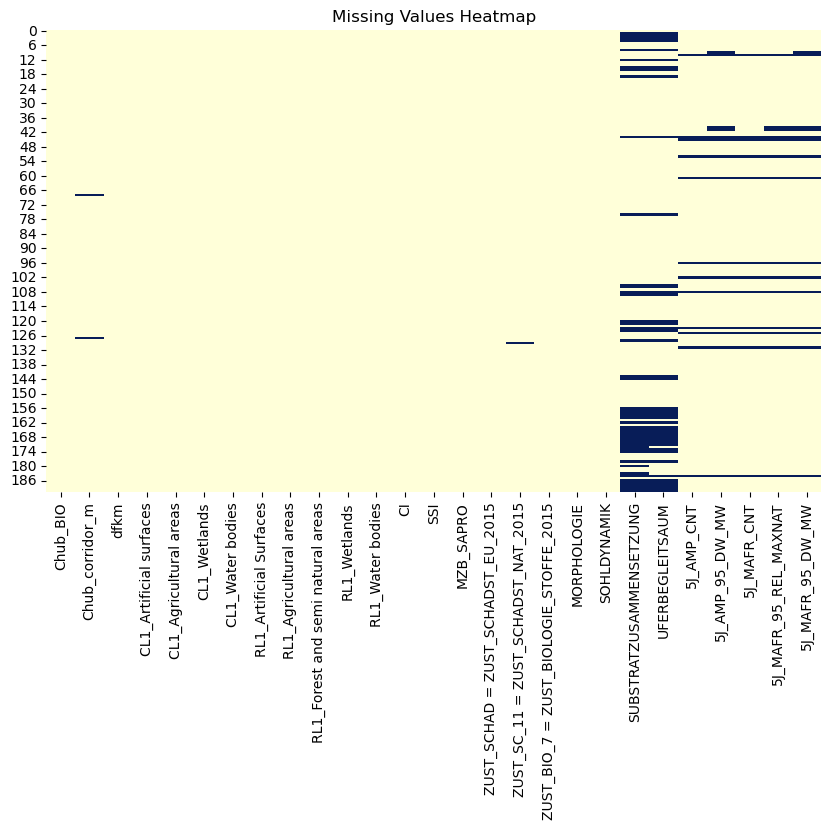

Missing data in each column:
Chub_corridor_m                        2
ZUST_SC_11 = ZUST_SCHADST_NAT_2015     1
SUBSTRATZUSAMMENSETZUNG               48
UFERBEGLEITSAUM                       45
5J_AMP_CNT                            12
5J_AMP_95_DW_MW                       15
5J_MAFR_CNT                           12
5J_MAFR_95_REL_MAXNAT                 14
5J_MAFR_95_DW_MW                      15
dtype: int64


In [98]:
# plot the observations that have missing values
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title('Missing Values Heatmap')
plt.show()

# Summary of missing values
missing_data = df.isnull().sum()
print("Missing data in each column:")
print(missing_data[missing_data > 0])

In [99]:
# drop rows where features have <5% missing
df = df.dropna(axis=0, subset=['ZUST_SC_11 = ZUST_SCHADST_NAT_2015', 'Chub_corridor_m'])

# impute with means where features have 5-10% missing
means = {'5J_AMP_CNT': df['5J_AMP_CNT'].mean(),
        '5J_AMP_95_DW_MW': df['5J_AMP_95_DW_MW'].mean(),
         '5J_MAFR_CNT': df['5J_MAFR_CNT'].mean(),
        '5J_MAFR_95_REL_MAXNAT': df['5J_MAFR_95_REL_MAXNAT'].mean(),
        '5J_MAFR_95_DW_MW': df['5J_MAFR_95_DW_MW'].mean()}
df = df.fillna(value=means, axis=0)

# drop features when more than 10% are missing
df = df.drop(labels=['SUBSTRATZUSAMMENSETZUNG', 'UFERBEGLEITSAUM'], axis=1)

In [103]:
# double check whether all missing values were dealt with
df.isna().sum()

Chub_BIO                                  0
Chub_corridor_m                           0
dfkm                                      0
CL1_Artificial surfaces                   0
CL1_Agricultural areas                    0
CL1_Wetlands                              0
CL1_Water bodies                          0
RL1_Artificial Surfaces                   0
RL1_Agricultural areas                    0
RL1_Forest and semi natural areas         0
RL1_Wetlands                              0
RL1_Water bodies                          0
CI                                        0
SSI                                       0
MZB_SAPRO                                 0
ZUST_SCHAD = ZUST_SCHADST_EU_2015         0
ZUST_SC_11 = ZUST_SCHADST_NAT_2015        0
ZUST_BIO_7 = ZUST_BIOLOGIE_STOFFE_2015    0
MORPHOLOGIE                               0
SOHLDYNAMIK                               0
5J_AMP_CNT                                0
5J_AMP_95_DW_MW                           0
5J_MAFR_CNT                     

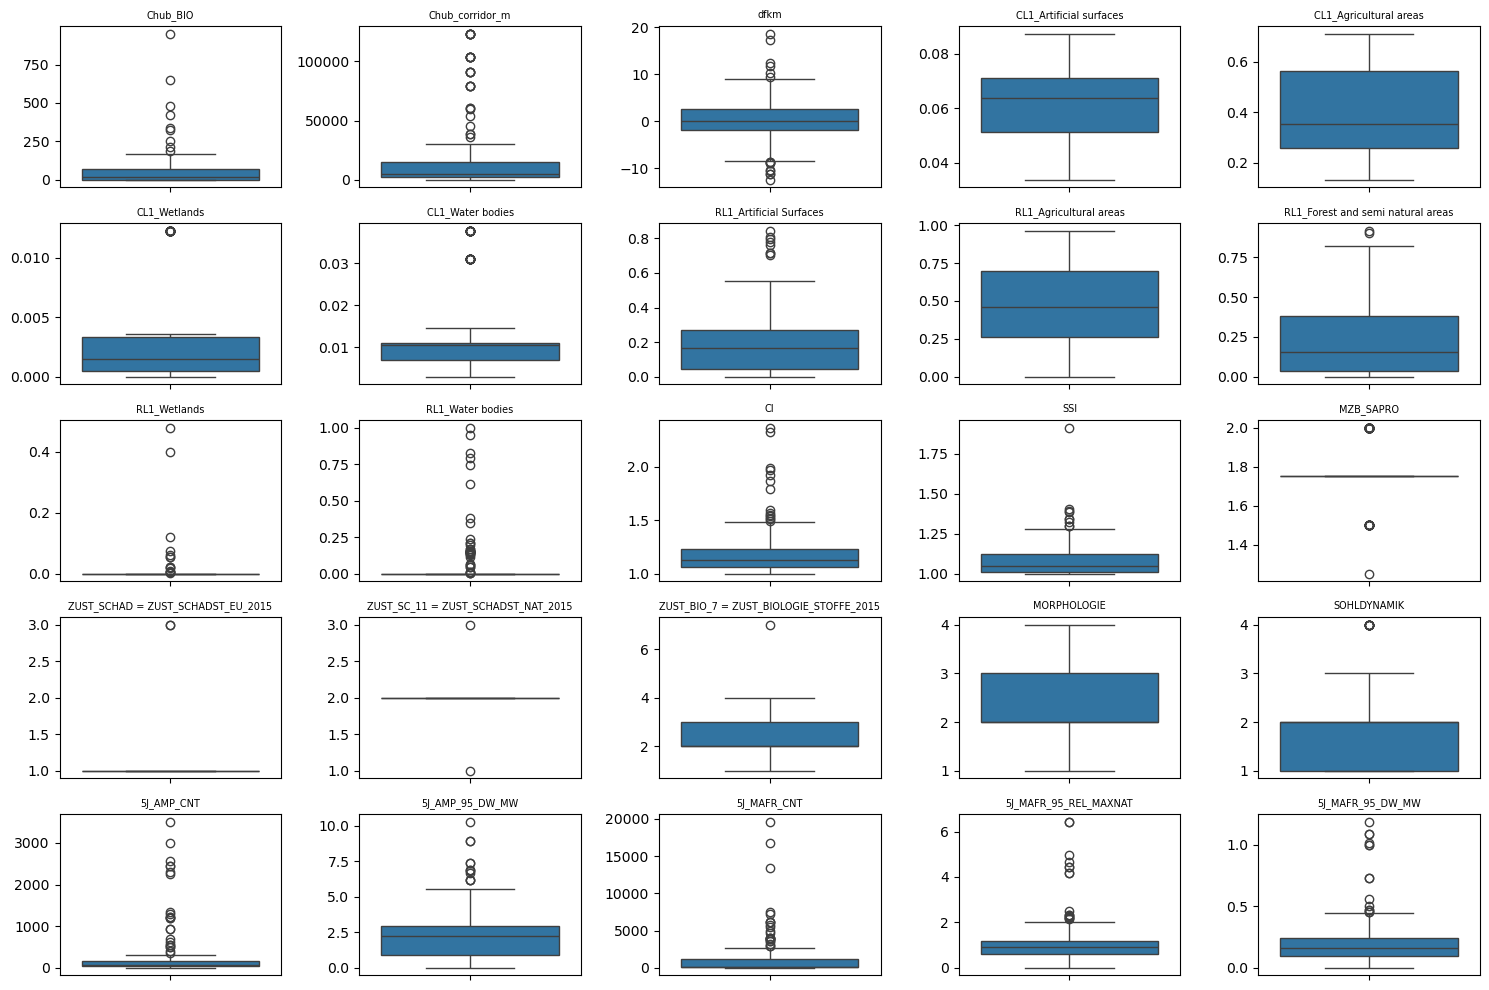

In [121]:
# Outlier detection using box plots
import matplotlib.pyplot as plt

# Selecting a few continuous variables to check for outliers
continuous_vars = list(df.columns)

plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=var, data=df)
    plt.title(var, fontsize=7)
    plt.ylabel('')
plt.tight_layout()
plt.show()


The box plots reveal the presence of outliers across multiple variables in the dataset.
- Chub_BIO (Chub Biomass) and Chub_corridor_m show several significant outliers with much higher values than the rest of the data.
- Hydrological variables like 5J_AMP_CNT and 5J_MAFR_CNT have numerous outliers, indicating extreme variations in certain river sections.
- Environmental and condition indices (e.g., CI, SSI, ZUST_SCHAD, and ZUST_BIO_7) also exhibit outliers, reflecting significant differences in specific river sections' conditions or pollutant levels.
- Some features, such as RL1_Agricultural areas, SOHLDYNAMIK, and MORPHOLOGIE, show no significant outliers, indicating a more consistent distribution across the dataset.

I will remove datapoints that lie outside the bounds defined using IQR. 
- lower bound = Q1 -1.5 * IQR
- upper bound = Q3 + 1.5 * IQR

In [131]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, factor):
    """
    remove datapoints lying outside of boundaries defined using IQR:
        - lower bound = Q1 - factor * IQR
        - upper bound = Q3 + factor * IQR
    Args:
        df (DataFrame) containing dataset
    Returns:
        df clean: DataFrame with outliers removed.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for each column
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    # Filter the dataframe by excluding outliers
    df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    return df_clean

In [132]:
df_clean = remove_outliers_iqr(df, factor=1.5)
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")


Original dataset shape: (188, 25)
Cleaned dataset shape: (32, 25)


In [133]:
df_clean = remove_outliers_iqr(df, factor=3)
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")

Original dataset shape: (188, 25)
Cleaned dataset shape: (54, 25)


Removing Outliers this way reduces the dataset too much. This indicates that the outliers are part of a natural variability in the data and should be retained. Instead of removing the information that is carried in these outliers I will transform the variables using feature scaling. This will reduce the effect the outliers have. 

### Correlation
The Correlation Matrix below shows that there are a few clusters of features that are strongly associated with each other. A few that stand out are:
- The different surface types surrounding the catchment area (e.g. 'CL1_Agricultural surface' and 'CL1_Artificial Surface') are obviously correlated, since an increase in one type, means a decrease of the other.
- 'MORPHOLOGIE' and 'SOHLDYNAMIK' are very strongly correlated.
- On the bottom right all the features starting with "5J_.." are correlated. These are various hydrological measures.

Aside from that we can see that no single feature is strongly correlated to the target 'Chub_BIO'. 'CL1_Agricultural_Surfaces'

Text(0.5, 1.0, 'Correlation Heatmap')

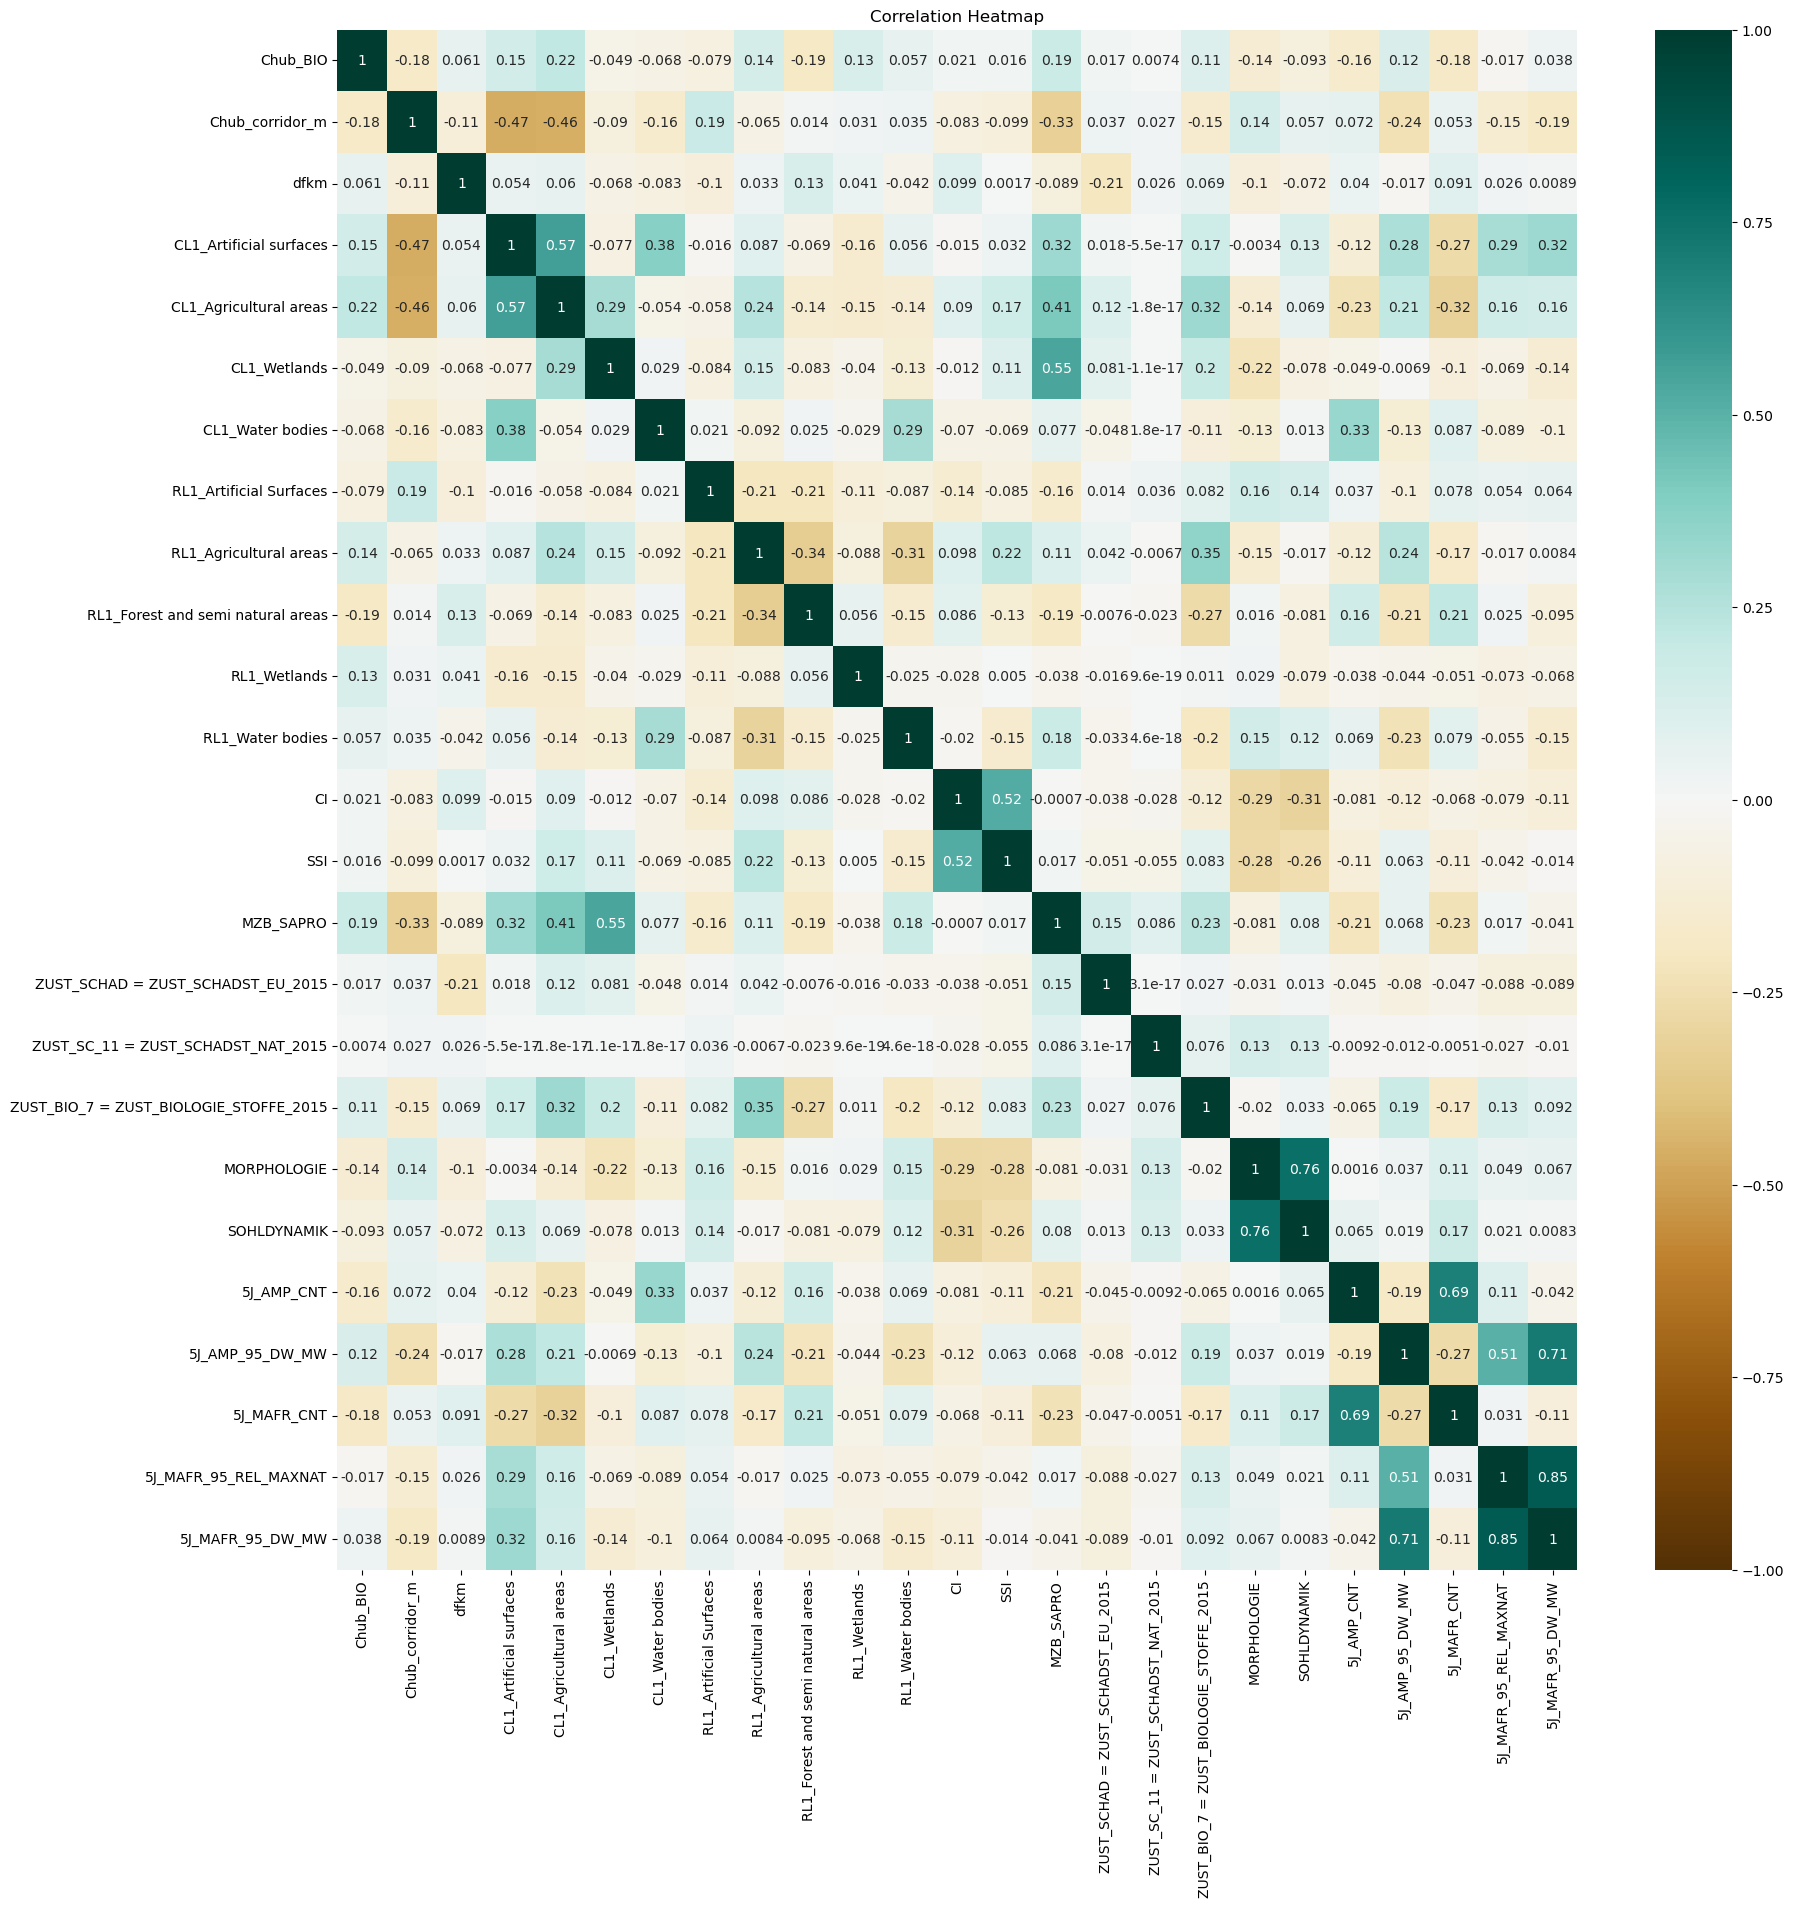

In [136]:
# plot the correlation using a heatmap
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1,cmap='BrBG', annot=True)
heatmap.set_title("Correlation Heatmap")

### Distribution of Data
The histogram below shows the distributions of the variables.  
A few features seem to be **normally** distributed:
- 'dfkm'
- 'CL1_Artificial surfaces'
- 'CL1_Agricultural areas'
- 'RL1_Agricultural areas'
- 'UFERBEGLEITSAUM'
- '5J_MAFR_95_REL_MAXNAT' with a strong right skew
  
Two features seem to be mostly **constant**:
- 'ZUST_SCHAD = ZUST_SCHADST_EU_2015'
- 'ZUST_SC_11 = ZUST_SCHADST__NAT_2015'

The remaining features look like they are **exponentially** distributed.


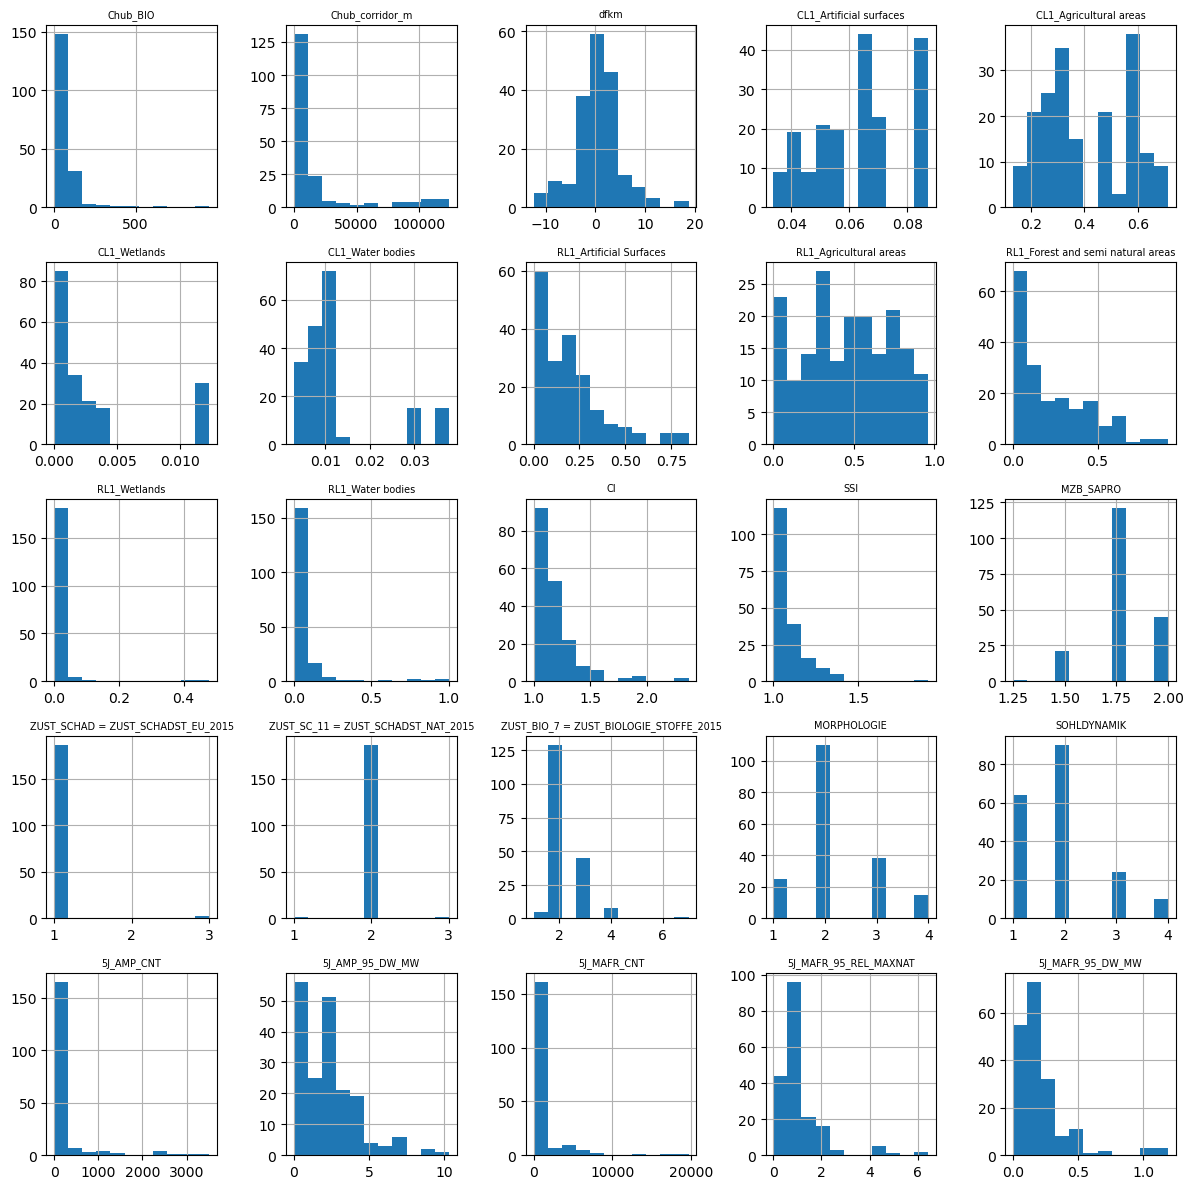

In [137]:
# plot histogram
axes = df.hist(bins=11, figsize=(12, 12))
for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=7)

plt.tight_layout()
plt.show()

**Note on logarithmic transformation:** A lot of the features have a strong right skew. They might need to be logarithmically transformed, if more advanced linear methods are applied. However since not all models need normally distributed data, I will wait until we know which type of model to develop to decide whether to transform them.

## Model Training
A lot of features are correlated with each other, indicating that some supervised models like linear models, will likely overfit. Therefore it will be beneficial to apply PCA for dimensionality reduction before running supervised models.  

Also most features are not normally distributed, which would be a problem for basic linear models. But since PCA is only concerned with finding the directions in the feature space of highest variance, the shape of the distribution (e.g. normal, exponential) doesn't matter.  After running the data through PCA, the original distribution will have a minimal effect on the supervised models. 

**Strategy:** The aim is to increase the accuracy of predictions of a linear model, by applying PCA.
1. Run Base Model without PCA
2. Run Base Model with PCA
3. Hyperparameter Tune PCA Model using cross validation
4. Calculate Test Error

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                    train_test_split)
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  make_scorer, root_mean_squared_error
from sklearn.preprocessing import Normalizer

In [139]:
# split data into training and test sets
y = df["Chub_BIO"]
X = df.drop("Chub_BIO", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
print(f'X_train has {X_train.shape[0]} samples and {X_train.shape[1]} features.')
print(f'X_test has {X_test.shape[0]} samples and {X_test.shape[1]} features.')

X_train has 150 samples and 24 features.
X_test has 38 samples and 24 features.


### Multilinear Regression

In [141]:
# Initialize the model
lm = LinearRegression()

# standardize data
scaling = StandardScaler()
scaled_X_train = scaling.fit_transform(X_train)

# Define a custom scorer for RMSE using the new function
rmse_scorer = make_scorer(root_mean_squared_error)

# Perform cross-validation and calculate RMSE
rmse_scores = cross_val_score(lm, scaled_X_train, y_train, scoring=rmse_scorer, cv=10)
r2_scores = cross_val_score(lm, scaled_X_train, y_train, scoring='r2', cv=10)
# Calculate the average RMSE across the folds
rmse_mean = rmse_scores.mean()
r2_mean = r2_scores.mean()

print("Average R2 score of a basic linear model:", r2_mean)
print("Average RMSE of a basic linear model:", rmse_mean)
print("Mean of target is:", y_train.mean())

Average R2 score of a basic linear model: -0.9554642002983804
Average RMSE of a basic linear model: 114.85508704092533
Mean of target is: 55.05757333333335


Text(0, 0.5, 'Count')

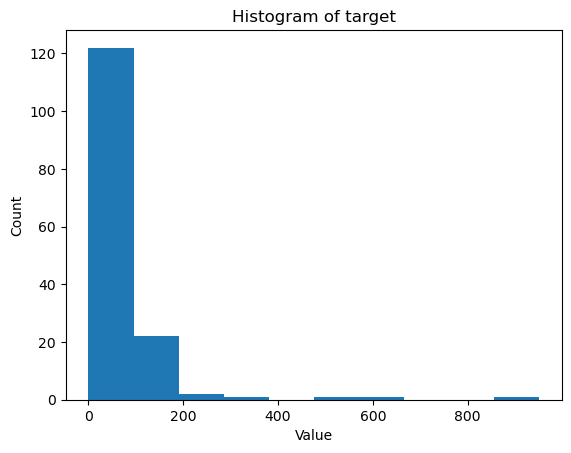

In [142]:
plt.hist(y_train)
plt.title("Histogram of target")
plt.xlabel("Value")
plt.ylabel("Count")

In [ ]:
plt.boxplot(y_train)
plt.title("Boxplot of Target")
plt.ylabel("value")

The basic linear model performs very poorly
With a negative R2 score and an RMSE more than twice the mean of the target, this model is clearly not performing well. The histogram above shows that the target is exponentially distributed and has some large outliers. Logarithmically transforming the target might improve the predictions.

In [143]:
# Initialize the model
lm = LinearRegression()

# transform target since it has exponential distribution
log_y_train = np.log(y_train+1)

# standardize data
scaling = StandardScaler()
scaled_X_train = scaling.fit_transform(X_train)

# Define a custom scorer for RMSE using the new function
rmse_scorer = make_scorer(root_mean_squared_error)

# Perform cross-validation and calculate RMSE
rmse_scores = cross_val_score(lm, scaled_X_train, log_y_train, scoring=rmse_scorer, cv=10)
r2_scores = cross_val_score(lm, scaled_X_train, log_y_train, scoring='r2', cv=10)
# Calculate the average RMSE across the folds
rmse_mean = rmse_scores.mean()
r2_mean = r2_scores.mean()

print("Average R2 score of a basic linear model:", r2_mean)
print("Average RMSE of a basic linear model:", rmse_mean)
print("Mean of target is:", log_y_train.mean())

Average R2 score of a basic linear model: 0.11042843673726707
Average RMSE of a basic linear model: 1.8331881842510576
Mean of target is: 2.466908817730803


Text(0, 0.5, 'Count')

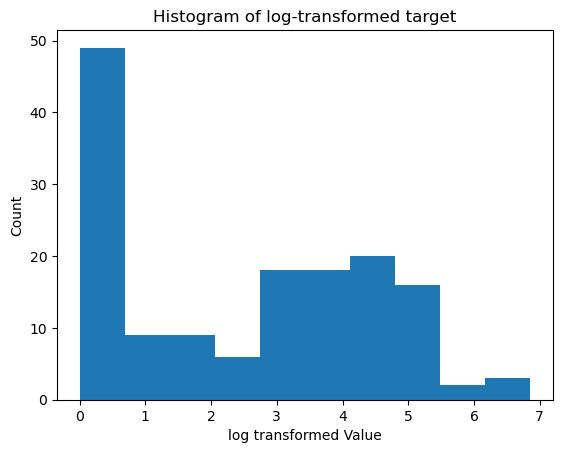

In [144]:
plt.hist(log_y_train)
plt.title("Histogram of log-transformed target")
plt.xlabel("log transformed Value")
plt.ylabel("Count")

Text(0, 0.5, 'log transformed value')

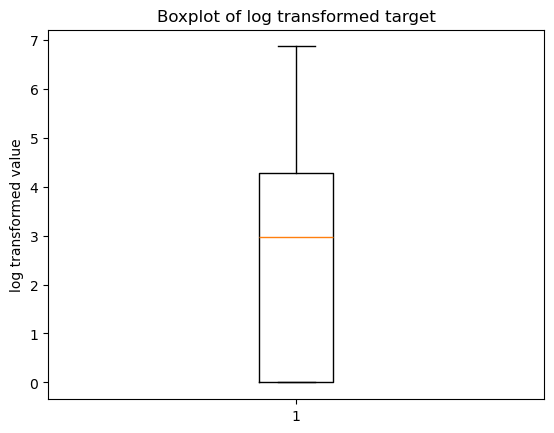

In [145]:
plt.boxplot(log_y_train)
plt.title("Boxplot of log transformed target")
plt.ylabel("log transformed value")

Logarithmically transforming the target greatly improves performance. The distribution looks normal, except for the large amount of observations where the value was Zero. In the Boxplot we can see that log-transforming also took care of the outliers. But the model is still not very useful with an R2=0.11.

### Principal Components Analysis

In [202]:
# Apply logarithmic transformation to y_train
log_y_train = np.log(y_train+1)

# Standardize X_train and apply PCA as before
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_train_scaled)

# Train the model on the transformed target
lm = LinearRegression()
rmse_scores = cross_val_score(lm, X_pca, log_y_train, scoring=rmse_scorer, cv=10)
r2_scores = cross_val_score(lm, X_pca, log_y_train, scoring='r2', cv=10)

# Calculate the average RMSE and R2 across the folds
rmse_mean = rmse_scores.mean()
r2_mean = r2_scores.mean()

print("Average R2 score of a basic linear model on log-transformed target:", r2_mean)
print("Average RMSE of a basic linear model on log-transformed target:", rmse_mean)


Average R2 score of a basic linear model on log-transformed target: 0.4581702437954857
Average RMSE of a basic linear model on log-transformed target: 1.056990127539935


In [203]:
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative Explained Variance: \n{cum_explained_variance}')

Cumulative Explained Variance: 
[0.14232603 0.25246329 0.34385944 0.41483829 0.47886013 0.53926853
 0.59245865 0.64211835 0.68800982 0.72778006 0.7652196  0.80213274
 0.83414654 0.86211567 0.88814737 0.91224431 0.93096616 0.94691995
 0.96126437 0.97167428 0.98111415 0.98823936 0.99353784 0.99819623
 1.        ]


The array above shows the cumulative sum explained by the addition of each principal component. Together the first five principal components explain 50% of variation in the data, the first 10 principal components explain 75%, and 15 components explain 90%. And of course taking all 24 variables explains 100%.

This suggests that the data is relatively complex, as many components are required to capture a significant amount of the variance in the data. Another possibility is that there is a lot of noise in the data.

Using only the first 15 PCs improves the performance of the linear model (R2=0.46)

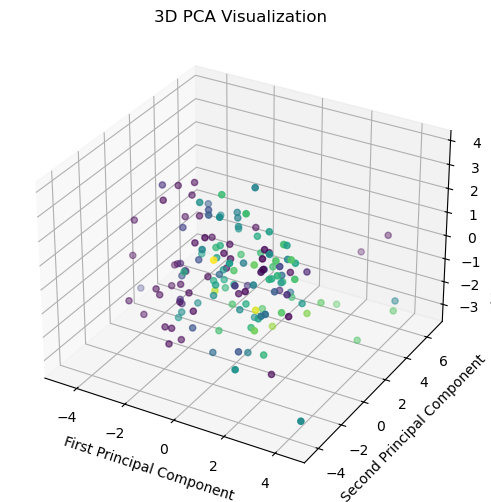

In [151]:
# Visualizing the first 3 principal components
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming `X_pca` is your PCA transformed data and `target` contains the labels or groups
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=log_y_train, cmap='viridis')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.title('3D PCA Visualization')
plt.show()

This plot shows the distribution of data amongs the first three principal components. While the PCA reduces dimensionality it doesn't seem to work very effectively on this dataset. There is no distinct seperation between the three principal components. This indicates that the data is more complex and doesn't naturally segment into three distinct classes. 
Because of the above, and the fact that the first three PC's only explain 35% of the variance in the data. I will use more PCs. 

### Remove Observations where target=0
There are a lot of observations where the target=0. I thought removing these 48 observations might improve the model. But it just made it worse.

In [204]:
# split data into training and test sets
df_zero = df_na.drop(axis=0, index=list(df_na["Chub_BIO"][df_na["Chub_BIO"]==0].index))
y = df_zero["Chub_BIO"]
X = df_zero.drop("Chub_BIO", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
# Apply logarithmic transformation to y_train
log_y_train = np.log(y_train+1)

# Standardize X_train and apply PCA as before
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_train_scaled)

# Train the model on the transformed target
lm = LinearRegression()
rmse_scores = cross_val_score(lm, X_pca, log_y_train, scoring=rmse_scorer, cv=10)
r2_scores = cross_val_score(lm, X_pca, log_y_train, scoring='r2', cv=10)

# Calculate the average RMSE and R2 across the folds
rmse_mean = rmse_scores.mean()
r2_mean = r2_scores.mean()

print("Average R2 score of a basic linear model on log-transformed target:", r2_mean)
print("Average RMSE of a basic linear model on log-transformed target:", rmse_mean)

Average R2 score of a basic linear model on log-transformed target: 0.4581702437954857
Average RMSE of a basic linear model on log-transformed target: 1.056990127539935


### Bucketize the target

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Bucketize the target variable 'Chub_BIO'
bins = [0, 50, 100,  150, 200, np.inf]  # Example bin edges (adjust based on your data)
labels = list(pd.Series(bins).astype('string'))
labels.pop()

dfb = df.copy()
dfb['Chub_BIO_binned'] = pd.cut(dfb['Chub_BIO'], bins=bins, labels=labels, right=False)

# Prepare data for model training
yb = dfb["Chub_BIO_binned"]
X = dfb.drop(["Chub_BIO", "Chub_BIO_binned"], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, yb, test_size=0.2, random_state=42)

# Standardize X_train and apply PCA as before
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_train_scaled)

# Train the model on the bucketized target using Logistic Regression
lm = LogisticRegression(max_iter=1000)  # Logistic Regression is used here for classification
accuracy_scorer = make_scorer(accuracy_score)

# Perform cross-validation and calculate accuracy
accuracy_scores = cross_val_score(lm, X_pca, y_train, scoring=accuracy_scorer, cv=10)

# Calculate the average accuracy across the folds
accuracy_mean = accuracy_scores.mean()

print("Average Accuracy score of a basic logistic model on bucketized target:", accuracy_mean)



Average Accuracy score of a basic logistic model on bucketized target: 0.62


C:\Anaconda\envs\Main\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


In [236]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define basic binning for 'Chub_BIO'
bins = [0, 50, 100, 150, 200, np.inf]
labels = list(pd.Series(bins).astype('string'))
labels.pop()

df['Chub_BIO_binned'] = pd.cut(df['Chub_BIO'], bins=bins, labels=labels, right=False)

# Prepare data for model training
y = df["Chub_BIO_binned"]
X = df.drop(["Chub_BIO", "Chub_BIO_binned"], axis=1)

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build pipeline for PCA, scaling, and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the features
    ('pca', PCA()),  # Step 2: Apply PCA (n_components will be tuned)
    ('logreg', LogisticRegression(max_iter=10000, random_state=42))  # Step 3: Logistic Regression
])

# hyperparameter grid
param_grid = {
    'pca__n_components': [10, 11, 12, 13, 15, 16],  # Number of principal components to consider
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__penalty': ['l1', 'l2'],  # Type of regularization (L1 or L2)
    'logreg__solver': ['liblinear', 'saga']  # Solvers that support L1 regularization
}

# Initialize GridSearchCV 
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Calculate test accuracy
test_score = grid_search.best_estimator_.score(X_test, y_test)

# Print the best parameters, cv accuracy, and test accuracy
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}')
print(f'Test Set Accuracy: {test_score:.4f}')


Best Parameters: {'logreg__C': 0.001, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear', 'pca__n_components': 10}
Best Cross-Validation Accuracy: 0.7000
Test Set Accuracy: 0.7105


C:\Anaconda\envs\Main\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


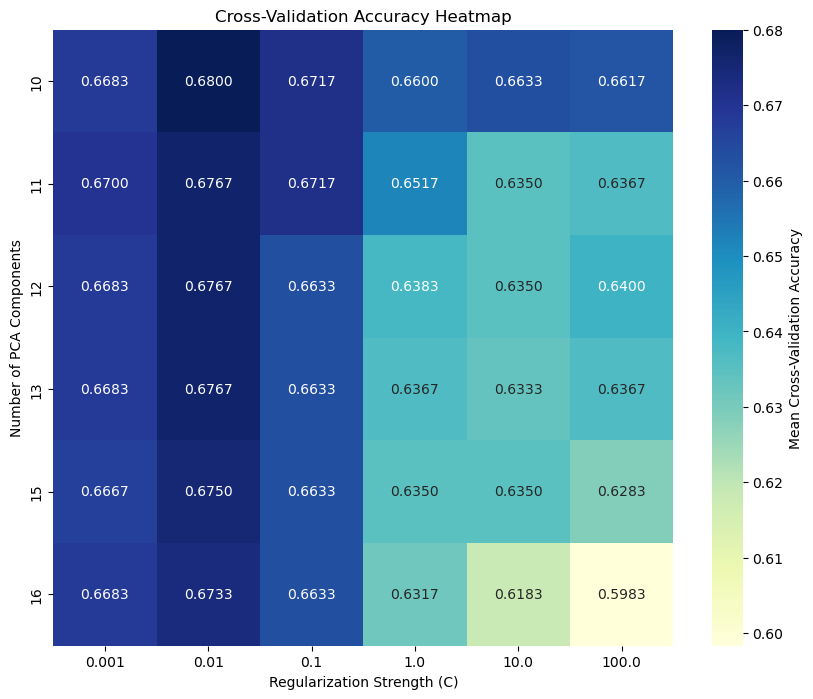

In [223]:
# Convert the GridSearchCV results to a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Pivot the results to make a matrix suitable for a heatmap
heatmap_data = cv_results.pivot_table(values="mean_test_score", index="param_pca__n_components", columns="param_logreg__C")

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu", cbar_kws={'label': 'Mean Cross-Validation Accuracy'})
plt.title('Cross-Validation Accuracy Heatmap')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Number of PCA Components')
plt.show()


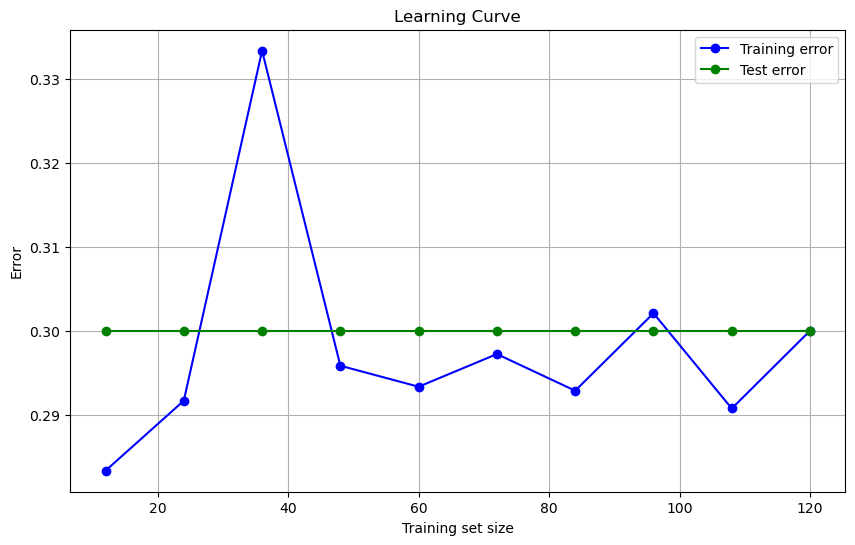

In [237]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate mean and standard deviation for training and test scores
train_error_mean = 1 - np.mean(train_scores, axis=1)
test_error_mean = 1 - np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_error_mean, 'o-', color='blue', label='Training error')
plt.plot(train_sizes, test_error_mean, 'o-', color='green', label='Test error')
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Sharp changes in the training error suggest that the model's performance is very sensitive, specific to the data it's trained on. This could mean that the model is instable or that there is a lot of noise in the data. 
Another problem is that the test error is constant, suggesting that the model is underfitting or is just too simple to capture underlying patterns. 

## Summary

**Objective**  
The goal of this notebook was to analyze how environmental factors impact fish life, specifically focusing on predicting chub (Cyprinid) biomass in river sections. The analysis aimed to develop a predictive model by exploring various machine learning techniques, including dimensionality reduction and hyperparameter tuning.

**Exploratory Data Analysis**
- Data exploration showed that a lot of the features (including the target) were *exponentially distributed*. The target was logarithmically transformed to deal with that.  
- *Missing values* were imputed using the following imputation method:
    1. Features missing <5%: remove missing rows with missing observations
    2. Features missing 5-10%: impute missing values with feature mean
    3. Features missing over 20%: remove feature
- Boxplots showed a lot of *Outliers*. Removal using IQR boundaries was explored, but was avoided since that would have meant removing 80% of the data. 

**Modelling**
The initial linear model showed poor results (R2=-0.96), which improved after log-transforming the data (R2=0.11). 

A Correlation Heat map showed strong correlation among features, indicating that Principal Component Analysis would be helpful. PCA was applied to reduce dimensionality. Capturing the most significant variance while simplifying the dataset for subsequent modelling. PCA showed that the data was relatively complex, with the first 3 principal components only able to explain 35% of the variance in the data. A plot showed that there was no clear grouping of the data amongst these 3 principal components giving further evidence that more components were needed. 
Linear Regression using the first 15 principal components improved performance (R2=0.46)

Since performance was still relatively poor I decided to bin the target into 5 bins and use logistic regression instead. Again applying PCA with the first 15 components returned an accuracy score of 62%.

Based on somewhat promising results from the combination of bucketizing, PCA and logistic regression i built a pipeline for hyperparameter tuning. Accuracy increased by 8 percentage points reaching 70%, with a test accuracy of 71%.

In conclusion best results were obtained using the strategy of binning, PCA and then logistic regression. However strange learning curves showed that there were still significant issues with the model and/or the noise in the data. 

**Next Steps**
- Interaction Features: Explore interaction terms between features that might better capture complex relationships in the data.
- Non-linear Transformations: Apply non-linear transformations (e.g., polynomial features) to capture non-linear relationships that linear models might miss.
- Additional Feature Selection: try Lasso regularization to refine feature selection, especially after PCA.
- try more complex models that are also less sensitive to outliers (Random Forest)
- try other outlier removal strategies, especially after transforming exponentially distributed features.


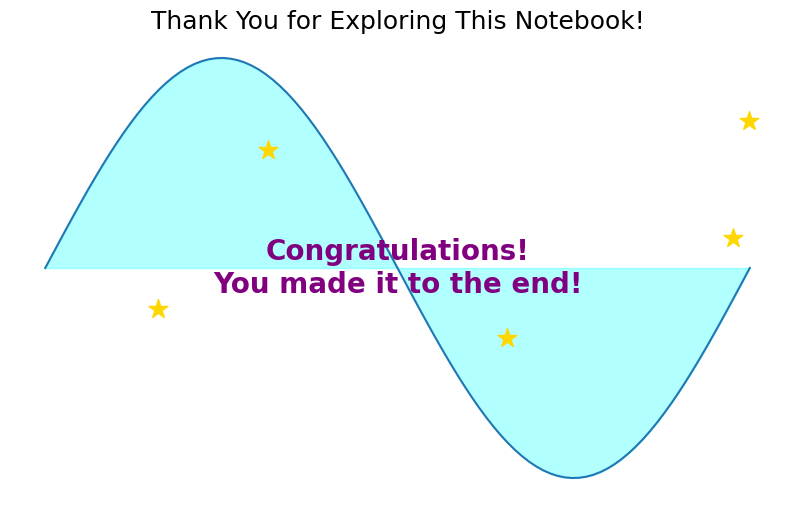

In [239]:
# Create a simple congratulatory message with a fun design
plt.figure(figsize=(10, 6))
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Plot a fun design (sine wave) with a congratulatory message
plt.plot(x, y, label="Fun Wave")
plt.text(np.pi, 0, 'Congratulations!\nYou made it to the end!', 
         horizontalalignment='center', verticalalignment='center', 
         fontsize=20, color='purple', fontweight='bold')
plt.fill_between(x, y, alpha=0.3, color="cyan")

# Add stars or other fun elements
for i in range(5):
    plt.scatter(np.random.uniform(0, 2 * np.pi), np.random.uniform(-1, 1), 
                color='gold', s=200, marker='*')

plt.title('Thank You for Exploring This Notebook!', fontsize=18)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()
